# Pêndulo simples (de verdade!)

Era uma vez, em um curso de Física básica, um professor que resolveu apresentar para seus alunos a solução de um problema simples com comportamento oscilatório.

Depois de fazer as habituais simplificações desconsiderando atrito e resistência do ar, considerando a massa pontual e a haste sem massa e rígida, o professor mostrou que o único elemento que varia com o tempo é o ângulo $\theta$ em relação à posição de repouso vertical e que esse ângulo obedece a seguinte equação diferencial:
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\sin\theta
$$
onde $g$ é a aceleração da gravidade, $\ell$ é o comprimento da haste e $\theta$ é dado em radianos.

Infelizmente, o seno na equação acima causou um breve desconforto: A função seno não é linear, o que significa que os métodos conhecidos de solução de equações diferenciais não funcionam. O desconforto foi breve, pois existe uma técnica tradicional para esses casos: Eliminamos as não linearidades aproximando as funções não lineares por funções lineares numa faixa de valores desejadas. Neste caso, basta supor que $\theta$ sempre será pequeno (isto é, o pêndulo nunca se afasta muito da posição de repouso). Neste caso, podemos aproximar $\sin\theta \approx \theta$.

Se você não acredita nessa aproximação, pode verificar com a ajuda do matplotlib.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

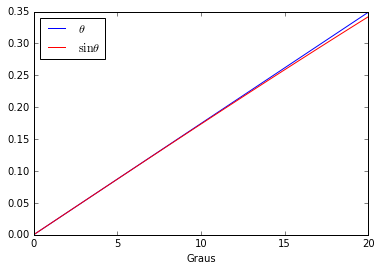

In [17]:
angulo = np.linspace(0,20,50) # Em graus
theta = angulo * np.pi / 180 # Em radiando
plt.plot(angulo, theta, 'b', label=r'$\theta$')
plt.plot(angulo, np.sin(theta), 'r', label=r'$\sin\theta$')
plt.xlabel('Graus')
plt.legend(loc='upper left')
plt.show()

Visualmente, só se percebe uma distinção entre $\theta$ e $\sin\theta$ após 10 graus.

Com essa aproximação, o professor alegremente transformou a equação diferencial acima, conseguindo:
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\theta
$$
que é uma equação diferencial linear (apenas variáveis e derivadas dessas variáveis estão presentes) e portanto sujeita às técnicas tradicionais de solução de equações diferenciais. Na verdade, essa equação é uma das mais conhecidas, e resulta em funções trigonométricas. Considerando que o pêndulo parte do repouso na posição inicial $\theta=\theta_0$, a solução será:
$$
\theta = \theta_0\cos\sqrt{\frac{g}{\ell}}t.
$$

Com isso, podemos usar matplotlib para plotar a solução dados valores para $\theta_0$ e $\ell$.

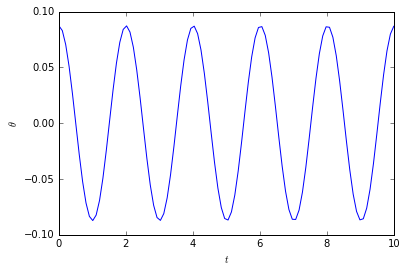

In [18]:
theta_0 = 5 * np.pi / 180 # 5 graus
comprimento = 1 # Por que não?
from scipy.constants import g # Aceleração padrão da gravidade
t = np.linspace(0, 10, 100) # 100 pontos de tempo entre 0 e 10
theta = theta_0 * np.cos(np.sqrt(g/comprimento)*t)
plt.plot(t, theta)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

E o professor e os alunos viveram felizes para sempre...

A não ser pela pulga que ficou atrás da orelha de alguns alunos: "E se $\theta_0$ não for pequeno?". Infelizmente, a história não conta se algum dos alunos perguntou isso ao professor depois da aula.

De qualquer forma, esse sistema tem uma característica curiosa: O período de oscilação é independe da amplitude. Quer dizer, para qualquer valor de $\theta_0$, o período de oscilação será:
$$
T = 2\pi\sqrt{\frac{\ell}{g}}.
$$
Isso é algumas vezes expresso dizendo que o período é uma característica do pêndulo, e independe da amplitude. Isso é um fato para o modelo matemático usado, como pode ser deduzido das equações, e conferido numericamente com o matplotlib.

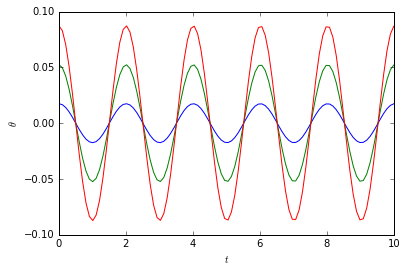

In [19]:
theta_0 = 5 * np.pi / 180 # 5 graus
comprimento = 1 # Por que não?
t = np.linspace(0, 10, 100) # 100 pontos de tempo entre 0 e 10
for angulo, cor in zip([1,3,5], ['b', 'g', 'r']):
    theta_0 = angulo * np.pi / 180
    theta = theta_0 * np.cos(np.sqrt(g/comprimento)*t)
    plt.plot(t, theta, cor, label=r'$\theta_0='+str(angulo)+r'^o$')
plt.ylabel(r'$\theta$')
plt.xlabel(r'$t$')
plt.show()

Mas será que isso é realmente verdade com relação ao pêndulo (o fenômeno físico, e não o modelo simplificado acima)?

O físico teórico não tem muitas opções nesta hora, mas o físico computacional sim!

Primeiro, voltamos à equação original, reproduzida abaixo:
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\sin\theta
$$

Vamos responder em primeiro lugar à questão sobre o período. Multiplicamos ambos os lados dessa equação por $d\theta/dt$, resultando em
$$
\frac{d\theta}{dt}\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}\sin\theta \frac{d\theta}{dt}
$$
Agora integramos os dois lados:
$$
\frac{1}{2}\left(\frac{d\theta}{dt}\right)^2 = -\frac{g}{\ell}\cos\theta + C
$$
e usando $\dot{\theta}=0$ em $t=0$ encontramos $C=-\frac{g}{\ell}\cos\theta_0$. Podemos agora isolar $d\theta/dt$:
$$
\frac{d\theta}{dt} = \sqrt{\frac{2g}{\ell}}\sqrt{\cos\theta - \cos\theta_0}
$$
e portanto
$$
dt = \sqrt{\frac{\ell}{2g}}\frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}.
$$

Notamos agora que o período corresponde a 4 vezes o tempo necessário para ir de 0 a $\theta_0$ (sobe, desce, sobe, desce), e portanto:
$$
T = 4 \sqrt{\frac{\ell}{2g}}\int_0^{\theta_0} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}.
$$

Até aqui não precisamos de física computacional e temos um resultado exato. O problema é como resolver essa integral. Para isso, precisamos usar integração numérica.

Como nada é de graça, não basta sair integrando numericamente a equação acima. O problema é que a integral vai até $\theta_0$, e próximo desse limite superior o denominador do integrando é muito pequeno, resultando em erros numéricos mesmo que o limite superior seja excluído.

É sempre necessário tomar cuidado com esse tipo de problemas quando aplicando soluções numéricas. Para contornar esse problema, usamos um pouco de trigonometria, lembrando que
$$
\cos\theta - \cos\theta_0 = 2\left(\sin^2\frac{\theta_0}{2}-\sin^2\frac{\theta}{2}\right)
$$
(você pode verificar usando as expressões $\cos(a+b) = \cos a \cos b - \sin a \sin b$ e $\cos^2 x + \sin^2 x = 1$). Por fim, fazemos a transformação de variáveis
$$
\sin\xi = \frac{\sin\frac{\theta}{2}}{\sin\frac{\theta_0}{2}}
$$
o que resulta na equação:
$$
T = 4\sqrt{\frac{\ell}{g}}\int_0^{\pi/2} \frac{d\xi}{\sqrt{1 - \sin^2\frac{\theta_0}{2}\sin^2\xi}}.
$$

Essa equação pode ser integrada numericamente sem problemas de convergência.

## Trabalho, parte 1

No pacote `scipy` existe um módulo `integrate` que possui uma função `quad` que realiza a integração numérica. (Veja na documentação de `scipy` outras formas de realizar integração.)

Essa função é usada da seguinte forma:

    resultado, erro = scipy.integrate.quad(f, x0, xf)
    
e faz a integração da função `f` (que neste caso deve ser de apenas um parâmetro) entre `x0` e `xf`, retornando o valor da integral em `resultado` e uma avaliação do erro absoluto em `erro`.

Por exemplo, se queremos a integração numérica da expressão:
$$
\int_0^{\pi/2} \sin x\, dx
$$
basta fazer:

In [20]:
import scipy.integrate as integrate
val, err = integrate.quad(np.sin, 0, np.pi/2)
print('A integral de sin(x) para x de 0 a pi/2 vale', val, '(com erro absoluto avaliado em', err,')')

A integral de sin(x) para x de 0 a pi/2 vale 0.9999999999999999 (com erro absoluto avaliado em 1.1102230246251564e-14 )


Seu trabalho é usar essa função para criar um gráfico dos valores de $T$ em função de $\theta_0$, para $\theta_0$ variando de 0.5 a 120 graus. Compare os valores de período com o do modelo simplificado acima.

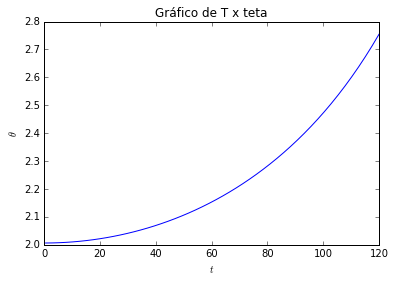

In [21]:
teta_zero = np.linspace(0.5, 120)
l = 1 # por que não?
alfa = 4*(np.sqrt(l/g))
T = []
Terro = []
for i in teta_zero:
    aux = np.sin(i*np.pi/360)**2 
    integral, erro = integrate.quad( lambda x: 1/np.sqrt(1-aux* np.sin(x)**2), 0, np.pi/2) 
    T.append(alfa*integral)
    Terro.append(alfa*erro)
    
plt.plot(teta_zero, T)    
plt.ylabel(r'$\theta$')
plt.title(r'Gráfico de T x teta')
plt.xlabel(r'$t$')
plt.show()

## Trabalho, parte 2

Agora vamos levar mais adiante nossa análise. Já que sabemos que o período no modelo mais completo é diferente do período no modelo simples queremos avaliar se há também mudança no formato da oscilação, quer dizer, se as oscilações resultantes são diferentes de oscilações harmonicas simples.

Para isso, precisamos resolver a equação diferencial ordinária não-linear que descreve o sistema. O `scipy`, em seu módulo `integrate` também oferece funções para resolver equações diferenciais ordinárias numericamente.

Neste trabalho, usaremos a função `odeint`, que é usada da seguinte forma:

    y = scipy.integrate.odeint(f, y0, t)
    
onde:
- `t` é um array com os instantes sucessivos de tempo usados na integração (devem ser suficientemente próximos)
- `y0` são os valores da condições iniciais (mais sobre isso abaixo)
- `f` é uma função que pega o valor atual de `y` e `t` e calcula a derivada nesse ponto.

Vejamos um exemplo. Suponhamos que desejamos resolver a equação diferencial
$$
\frac{dx}{dt} = -x^2
$$
com a condição inicial $x(0) = 1$ para $t$ de 0 a 10.

Em primeiro lugar, definimos uma função que calcula o valor da derivada, dado o valor da variável e do tempo:

In [22]:
def deriv(x, t):
    # Neste caso, a derivada é independente de t
    return -x**2

Em seguida, calculamos os valores desejados para $t$ e fazemos a chamada da função:

In [23]:
t = np.linspace(0,10,100) # Isto vai gerar intervalo de aproximadamente 0.1 entre valores consecutivos de t
x = integrate.odeint(deriv, 1, t) # O valor inicial é 1

Agora é só mostrar os resultados:

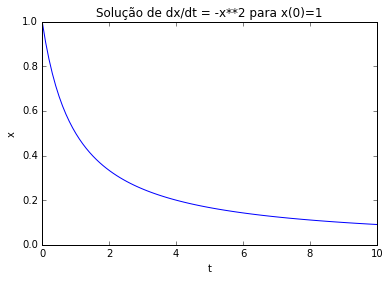

In [24]:
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.title(r'Solução de dx/dt = -x**2 para x(0)=1')
plt.show()

O problema agora é: nossa equação diferencial envolve derivadas segundas, e o `odeint` só entende derivadas simples. Felizmente o `odeint` está preparado para lidar com sistemas de múltiplas equações diferenciais, e existe uma forma padrão de transformar uma equação com derivadas de maior ordem num sistema de equações diferenciais apenas com derivada de primeira ordem: basta acrescentar uma nova variável para cada ordem necessária. Por exemplo, se temos derivada de segunda ordem, basta acrescentar uma nova variável.

Por exemplo, suponha que queremos solucionar a seguinte equação diferencial:
$$
\frac{d^2x}{dt^2} = -\sin(2x) - \frac{dx}{dt}
$$
com condições iniciais $x(0) = 1$ e $\frac{dx}{dt}|_{t=0} = 0$.

Neste caso, introduzimos uma variável $v = \frac{dx}{dt}$ e ficamos com o seguinte sistema de equações:
\begin{eqnarray}
\frac{dx}{dt} & = & v\\
\frac{dv}{dt} & = & -\sin(2x) - v
\end{eqnarray}
e as condições inicias serão $x(0) = 1$ e $v(0)=0$.

Temos então um sistema nas variáveis $x$ e $v$, e devemos reinterpretar os parâmetros para `odeint` da seguinte forma:
- `t` continua sendo um array com os instantes de tempo sucessivos.
- `y0` é uma lista com o valor inicial para $x$ e $v$, nessa ordem.
- `f` deve ser uma função que recebe uma lista com os valores atuais de $x$ e $v$, nessa ordem, e o instante de tempo atual e retorna uma lista com os valores das derivadas de $x$ e $v$, nessa ordem.

O valor retornando é um array com uma linha para cada instante de tempo e uma coluna para cada uma das variáveis (no nosso caso, duas colunas, a primeira para $x$ e a segunda para $v$).

Ficamos então com o seguinte código:

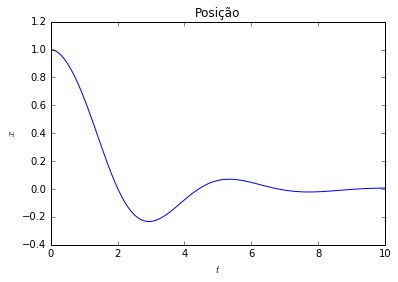

In [25]:
def deriv2(y, t):
    x = y[0]
    v = y[1]
    return v, -np.sin(2*x) - v

t = np.linspace(0,10,100)
y = integrate.odeint(deriv2, [1, 0], t)
x = y[:,0]
plt.plot(t, x)
plt.title('Posição')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

Se quisermos, podemos plotar também os valores da velocidade:

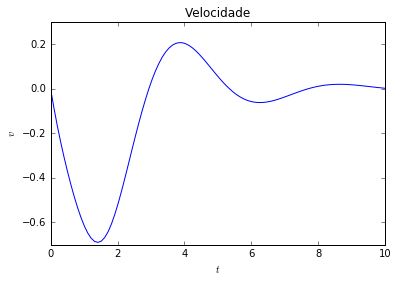

In [26]:
plt.plot(t, y[:,1])
plt.title('Velocidade')
plt.xlabel('$t$')
plt.ylabel('$v$')
plt.show()

O seu trabalho é reescrever a equação do pêndulo para um sistema de duas equações em duas variáveis e fazer a sua integração para os valores de $\theta_0$: 5, 30, 120 e 175 graus. Para cada um desses valores, gere um gráfico comparando com os resultados com os do modelo simplificado.

Para ter uma melhor comparação com relação à forma de onda, gere também gráficos da diferença entre o resultado da integração da equação diferencial e uma função do tipo
$$
f(t) = \theta_0 \cos \frac{2 \pi}{T} t
$$
onde $T$ é o período calculado (parte 1 da prática) para o valor de $\theta_0$ dado. Como a função vai ter as mesmas frequência e amplitude, qualquer diferença será devida a distorção na forma de onda. (Plote também esta função junto com os resultados de integração, para comparar visualmente.)

#### Dica:

Lembre-se que o modelo simplificado é bom para posições inicias abaixo de 10 graus. Portanto, teste os seus resultados rodando o código do modelo mais complexo e comparando com os resultados esperados para posições iniciais com valores baixos. Neste caso, as soluções devem ser indistinguíveis. Se isso não acontecer, há problema no seu código.

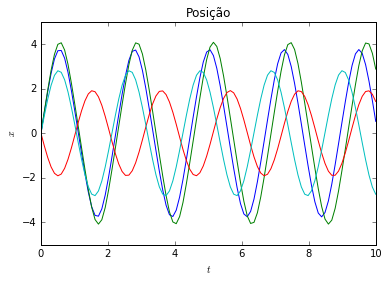

In [27]:
theta_zero = [5, 30, 120, 175]
l = 1
const= -g/l  
t = np.linspace(0,10,100)

def edo(lista, t):
    x = lista[0]
    y = lista[1]
    
    return y, const*np.sin(x)
   
for i in theta_zero:
    yh = integrate.odeint(edo, [i,0], t)
    xh = yh[:,1]
    plt.plot(t, xh)
    
plt.title('Posição')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()
    
    

In [28]:
teta_zero = np.linspace(0.5, 120)
t = np.linspace(0,10,100)
dif = []
Te = []
def T(teta):
    aux = np.sin(i*np.pi/360)**2 
    integral, erro = integrate.quad( lambda x: 1/np.sqrt(1-aux* np.sin(x)**2), 0, np.pi/2) 
    Te.append(alfa*integral)
    return Te

def ft (teta, t):
    d = 2* np.pi *t / T(teta)
    return teta * np.cos(d)


for i, j in zip(teta_zero, t):
    f = ft( i, j)
    for k,z in zip(xh,f):
       
        dif.append(k-z)
            
pl = dif[:, 1]  #não consegui arrumar este bug 
plt.plot(t, pl)
    
plt.title('Diferenças')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()
    
    

TypeError: list indices must be integers or slices, not tuple